In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [12]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_trained_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [49]:
x_trained_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [73]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [92]:
history=model.fit(x_trained_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8705 - val_loss: 0.3578 - val_accuracy: 0.8450
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8700 - val_loss: 0.3597 - val_accuracy: 0.8469
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8716 - val_loss: 0.3592 - val_accuracy: 0.8438
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.8687 - val_loss: 0.3584 - val_accuracy: 0.8487
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8692 - val_loss: 0.3601 - val_accuracy: 0.8469
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8687 - val_loss: 0.3588 - val_accuracy: 0.8462
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8714 - val_loss: 0.3586 - val_accuracy: 0.8438
Epoch 

In [93]:
model.layers[1].get_weights()

[array([[ 3.2887366e-01, -2.7354130e-01, -3.5521212e-01,  2.9602149e-01,
         -2.8339311e-01,  7.5772482e-01, -1.3116157e-01, -2.9452252e-01,
         -1.2051632e+00,  5.5352980e-01,  3.8596809e-01],
        [-1.1845888e+00,  2.0408559e-01,  4.0893037e-02,  2.5276041e-01,
         -2.1857470e-01,  6.9769138e-01,  5.1473778e-01,  5.8819205e-01,
         -3.0259115e-01, -5.6905347e-01, -2.2598721e-01],
        [ 1.7931002e-01,  7.2177790e-02, -5.7168014e-02,  1.8446717e-01,
         -5.0175482e-01,  4.9051735e-01,  4.4351909e-01,  7.8806216e-01,
         -6.0827315e-01,  1.3844247e-01, -5.0523990e-01],
        [-1.9476356e-01, -1.3741653e+00, -2.6048473e-01,  6.8718398e-01,
         -4.0485522e-01,  2.0499517e-01,  3.6593135e-02, -1.1431285e+00,
          2.0664032e-01, -8.9379054e-01,  4.6196528e-02],
        [ 1.4240119e-02, -6.0624927e-01, -6.0397390e-02,  6.8762046e-01,
          6.7567623e-01, -6.0627196e-02,  6.8326646e-01,  1.0542265e-01,
         -7.6685822e-01, -4.1815606e-0

In [94]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 687us/step


In [95]:
y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

In [97]:
import matplotlib.pyplot as plt

In [98]:
history.history

{'loss': [0.31571176648139954,
  0.31550928950309753,
  0.3152696192264557,
  0.315610408782959,
  0.31581154465675354,
  0.3158004581928253,
  0.31488320231437683,
  0.3158205449581146,
  0.3157253563404083,
  0.31576916575431824,
  0.3150905966758728,
  0.31541764736175537,
  0.3153647184371948,
  0.3151867687702179,
  0.31569021940231323,
  0.3150465786457062,
  0.31517693400382996,
  0.31512728333473206,
  0.31543588638305664,
  0.3152840733528137,
  0.3152737319469452,
  0.31533652544021606,
  0.3149228096008301,
  0.3153934180736542,
  0.3146246075630188,
  0.31522706151008606,
  0.31486883759498596,
  0.31517836451530457,
  0.31475773453712463,
  0.3149428963661194,
  0.3144909739494324,
  0.31523415446281433,
  0.3139685392379761,
  0.3146592080593109,
  0.31408247351646423,
  0.314414381980896,
  0.31410515308380127,
  0.31505081057548523,
  0.31475746631622314,
  0.31442153453826904,
  0.31432247161865234,
  0.3149602711200714,
  0.3146781623363495,
  0.31439444422721863,
  0

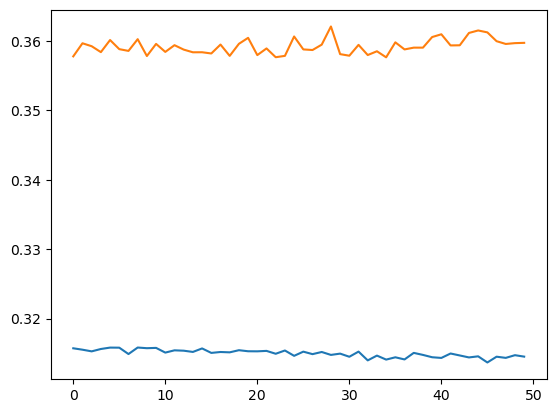

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])